# RBC using Dynare



$$
    \max_{\{C_t, I_t, K_t, B_t\}_{t=0}^\infty} E_0 \sum_{t=0}^\infty \beta^t \log(C_t)
$$

st.
$$
    C_t + I_t + \frac{B_t}{P_t} = Y_t + \frac{B_{t-1} R_{t-1}}{P_t} $$
$$
    Y_t = A_t K_{t-1}^\alpha (X_t h_t)^{1-\alpha} = A_t K_{t-1}^\alpha X_t^{1-\alpha} $$
$$
    K_t = (1 - \delta) K_{t-1} + I_t $$
$$
    \frac{R_t}{\bar{R}} = \left( \frac{\Pi_t}{\bar{\Pi}} \right)^\phi $$


[Dynare](https://dynarejulia.github.io/Dynare.jl/dev/) has an implementation in Julia. For example, we can solve a Basic RBC Classical Monetary Economy Model (from [J. Pfeifer](https://sites.google.com/site/pfeiferecon/dynare))

In [1]:
using Dynare, Plots
context = @dynare "./RBC_CME_basic.mod";

Dynare version: 0.9.5
2024-07-16T22:02:40.605: Starting @dynare ./RBC_CME_basic.mod
["RBC_CME_basic.mod", "language=julia", "json=compute"]
Dynare preprocessor version: 6.4.0+0
2024-07-16T22:02:40.924: End of preprocessing


Starting preprocessing of the model file ...
Found 7 equation(s).
Evaluating expressions...
Computing static model derivatives (order 1).
Normalizing the static model...
Finding the optimal block decomposition of the static model...
5 block(s) found:
  3 recursive block(s) and 2 simultaneous block(s).
  the largest simultaneous block has 2 equation(s)
                                 and 2 feedback variable(s).
Computing dynamic model derivatives (order 1).
Normalizing the dynamic model...
Finding the optimal block decomposition of the dynamic model...
4 block(s) found:
  2 recursive block(s) and 2 simultaneous block(s).
  the largest simultaneous block has 2 equation(s)
                                 and 2 feedback variable(s).
JSON written after Computing step.
Preprocessing completed.



2024-07-16T22:02:40.973: Start parse_statements!
  Steady state

────┬─────────
 y  │ 3.01533
  c │  2.3066
  k │ 28.3484
  A │     1.0
  z │     0.0
  R │  1.0101
 Pi │     1.0
────┴─────────

  Coefficients of approximate solution function (reduced form)

─────────┬──────────────────────────────────────────────────────
         │  y_t     c_t     k_t    A_t    z_t      R_t     Pi_t
────────────────────────────────────────────────────────────────
    ϕ(k) │ 0.0351   0.048  0.9621  -0.0   0.0  -0.0022  -0.0015
    ϕ(z) │ 2.9249  0.8836  2.0412  0.97  0.97   0.0801   0.0529
 eps_z_t │ 3.0153   0.911  2.1044   1.0   1.0   0.0826   0.0545
─────────┴──────────────────────────────────────────────────────

  Note: ϕ(x) = x_{t-1} - steady_state(x)

  THEORETICAL MOMENTS

──────────┬──────────────────────────────
 VARIABLE │  MEAN    STD. DEV.  VARIANCE
─────────────────────────────────────────
        y │  3.0153     0.1176    0.0138
        c │  2.3066     0.0765    0.0059
        k │ 28.348











Base.IOError("could not spawn `start './RBC_CME_basic\\graphs\\irfs_eps_z_1.png'`: no such file or directory (ENOENT)"

2024-07-16T22:02:42.974: End parser


, -4058)


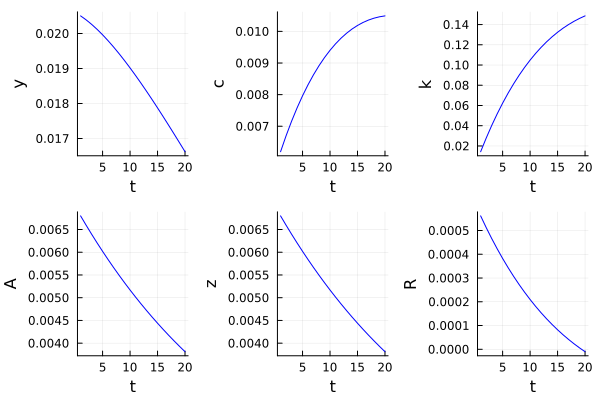

In [2]:
# context#.results.model_results #[:y]#[:y].irfs
# context.results.model_results[1].irfs

irf_eps_z = Dynare.irf(context = context)[:eps_z]
p1 = plot(irf_eps_z.y, label="", xlabel="t", ylabel="y", color=:blue)
p2 = plot(irf_eps_z.c, label="", xlabel="t", ylabel="c", color=:blue)
p3 = plot(irf_eps_z.k, label="", xlabel="t", ylabel="k", color=:blue)
p4 = plot(irf_eps_z.A, label="", xlabel="t", ylabel="A", color=:blue)
p5 = plot(irf_eps_z.z, label="", xlabel="t", ylabel="z", color=:blue)
p6 = plot(irf_eps_z.R, label="", xlabel="t", ylabel="R", color=:blue)
plot(p1,p2,p3,p4,p5,p6)

In [3]:
sim = Dynare.simulation(context = context)
sim

firstperiod: 1
lastperiod: 250
name: 
statement: stoch_simul
data: ┌─────┬─────────┬─────────┬─────────┬──────────┬──────────────┬─────────┬──────────┐
│     │       y │       c │       k │        A │            z │       R │       Pi │
├─────┼─────────┼─────────┼─────────┼──────────┼──────────────┼─────────┼──────────┤
│   1 │ 3.01533 │ 2.30662 │ 28.3484 │      1.0 │          0.0 │  1.0101 │      1.0 │
│   2 │ 2.98112 │ 2.29628 │ 28.3245 │ 0.988656 │   -0.0113445 │ 1.00916 │ 0.999382 │
│   3 │  2.9475 │ 2.28523 │ 28.2787 │ 0.977785 │    -0.022215 │ 1.00832 │ 0.998824 │
│   4 │ 2.93132 │ 2.27863 │ 28.2244 │ 0.972951 │   -0.0270489 │ 1.00802 │ 0.998628 │
│   5 │ 2.95158 │ 2.28272 │ 28.1877 │ 0.980302 │   -0.0196979 │ 1.00875 │ 0.999108 │
│   6 │ 2.96892 │ 2.28658 │ 28.1653 │  0.98648 │   -0.0135204 │ 1.00934 │ 0.999499 │
│   7 │ 3.00184 │ 2.29569 │ 28.1673 │ 0.997659 │  -0.00234106 │ 1.01032 │  1.00014 │
│   8 │ 2.97756 │ 2.28843 │ 28.1523 │ 0.989583 │   -0.0104172 │ 1.00964 │ 0.999698 

1-element Vector{Simulation}:
 

In [4]:
periods = 250
perfect_foresight!(; periods, context = context, display = true,
                    )

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Inf-norm of residuals: 0.000000
 * Iterations: 0
 * Convergence: true
   * |x - x'| < 1.0e-05: false
   * |f(x)| < 1.0e-05: true
 * Function Calls (f): 1


firstperiod: 1
lastperiod: 250
name: 
statement: stoch_simul
data: ┌─────┬─────────┬─────────┬─────────┬──────────┬──────────────┬─────────┬──────────┐
│     │       y │       c │       k │        A │            z │       R │       Pi │
├─────┼─────────┼─────────┼─────────┼──────────┼──────────────┼─────────┼──────────┤
│   1 │ 3.01533 │ 2.30662 │ 28.3484 │      1.0 │          0.0 │  1.0101 │      1.0 │
│   2 │ 2.98112 │ 2.29628 │ 28.3245 │ 0.988656 │   -0.0113445 │ 1.00916 │ 0.999382 │
│   3 │  2.9475 │ 2.28523 │ 28.2787 │ 0.977785 │    -0.022215 │ 1.00832 │ 0.998824 │
│   4 │ 2.93132 │ 2.27863 │ 28.2244 │ 0.972951 │   -0.0270489 │ 1.00802 │ 0.998628 │
│   5 │ 2.95158 │ 2.28272 │ 28.1877 │ 0.980302 │   -0.0196979 │ 1.00875 │ 0.999108 │
│   6 │ 2.96892 │ 2.28658 │ 28.1653 │  0.98648 │   -0.0135204 │ 1.00934 │ 0.999499 │
│   7 │ 3.00184 │ 2.29569 │ 28.1673 │ 0.997659 │  -0.00234106 │ 1.01032 │  1.00014 │
│   8 │ 2.97756 │ 2.28843 │ 28.1523 │ 0.989583 │   -0.0104172 │ 1.00964 │ 0.999698 

2-element Vector{Simulation}:
 
 

In [5]:
# Dynare.forecasting!(context=context)